In [52]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format='retina'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [113]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import special, stats

import utils

SEED = 1234

sns.set_theme()
sns.set_context("notebook", font_scale=1.5)

We are interested in the PCE approximation

$$
    \mathbf{1}_{c \leq X} \approx \sum_{n=0}^{N} \gamma_n(c) p_n(X)
$$

where:

- $X$ is a random variable distributed according to $\nu(dx) = \omega(x) dx$, a probability
    measure absolutely continuous with respect to the Lebesgue measure defined on the finite or infinite interval $[a,b]$.
- $c \in \mathbb{R}$ some parameter
- $(p_n)_{n\in\mathbb N}$ are orthogonal polynomials associated with the measure $\nu$ (e.g., Legendre, Hermite, Laguerre, Jacobi)
    $$
        \langle p_m,p_m \rangle_{L^2(\nu)} =
        \int_{a}^{b} p_n(x) p_m(x) \nu(dx) = h_n \delta_{mn}, \qquad \forall n,m \in \mathbb{N}
    $$
    where 
    $$
        h_n = \| p_n \|^2_{L^2(\nu)} = \int_{a}^{b} p_n(x)^2 \nu(dx)
    $$
- The coefficients $\gamma_n(c)$ are the PCE coefficients.

We study the $L^2$ truncation error

$$
    \mathcal{E}_{N}(c) 
    = 
    \mathbb{E}\left[ \left| \mathbf{1}_{c \leq X} - \sum_{n=0}^{N} \gamma_n(c) p_n(X) \right|^2\right]^{1/2}
$$

# 1. Plot of $L^2$ truncation error with respect to truncation order $N$

In [54]:
COLORS = ["blue", "orange", "green"]
MARKERS = [":*", ":+", ":s"]

In [55]:
n_max = 30
range_n = np.arange(1, n_max)
n_mc = 1 * 10**5

## 1.1 Hermite

In [72]:
c_hermite = np.array([0.1, 1.0, 2.0])
error_hermite = np.array(
    [
        [
            utils.l2_error(c=c, n_pce=n, n_mc=n_mc, poly="hermite", seed=SEED)[0]
            for n in range_n
        ]
        for c in c_hermite
    ]
)

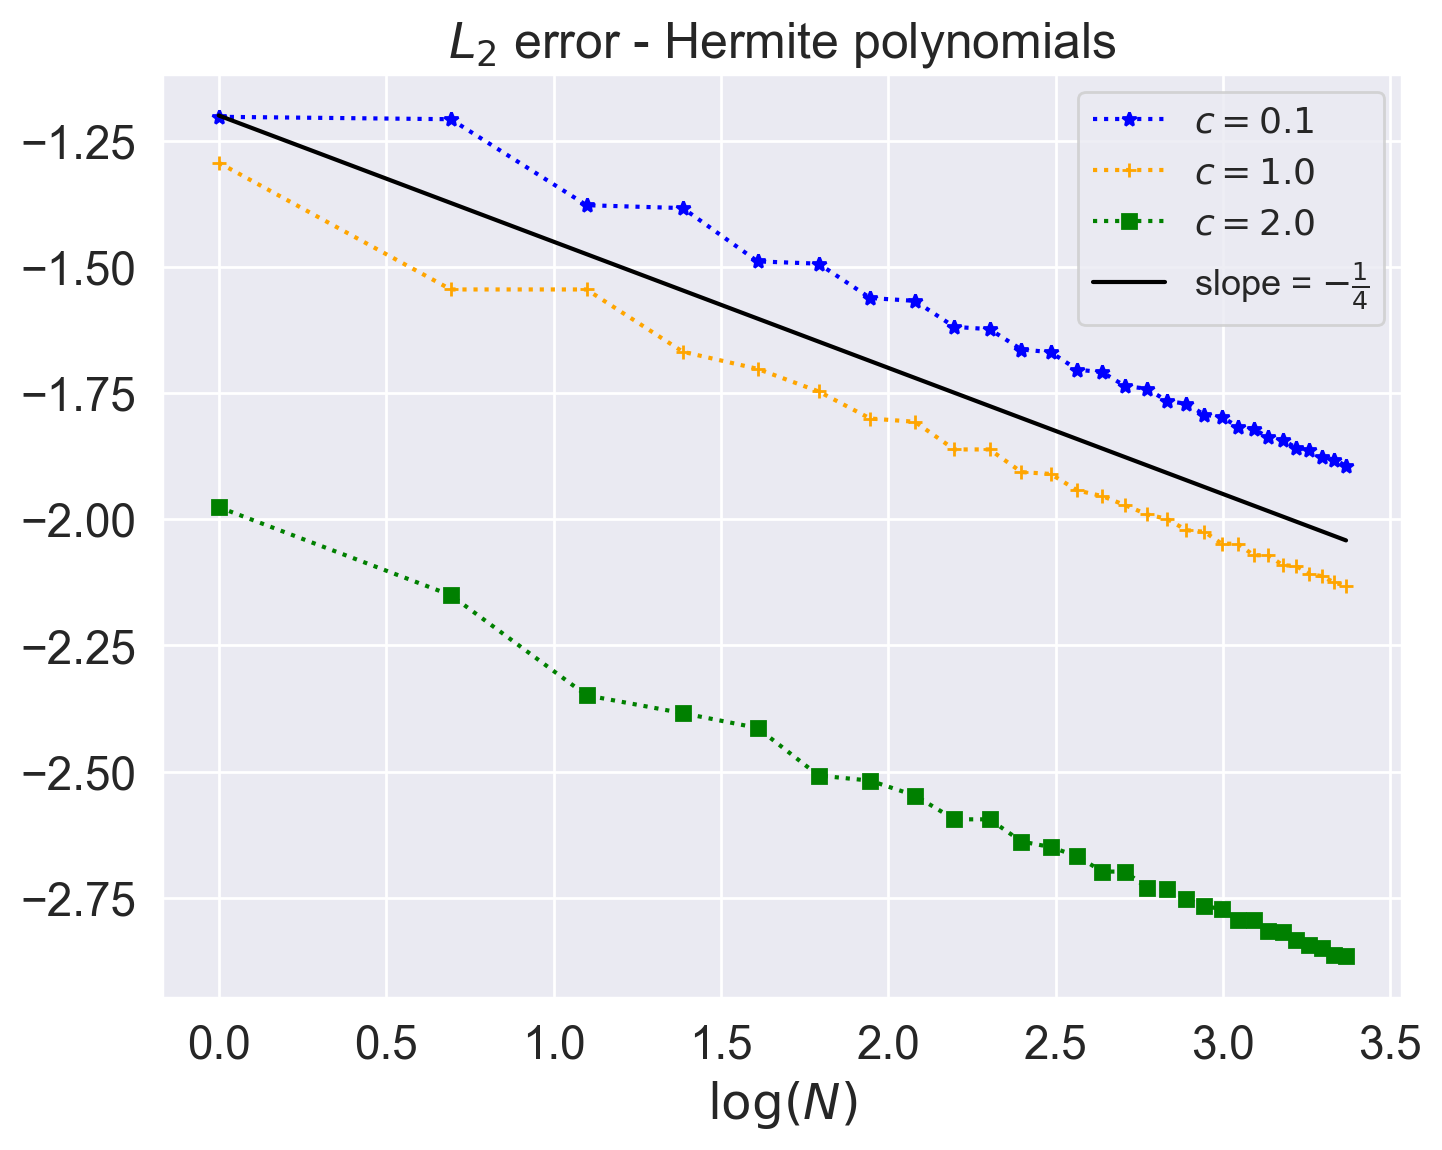

In [73]:
fig, ax = plt.subplots(figsize=(8, 6))
for i in range(len(c_hermite)):
    ax.plot(
        np.log(range_n),
        np.log(error_hermite[i, :]),
        MARKERS[i],
        markersize=5,
        label=f"$c={c_hermite[i]}$",
        color=COLORS[i],
    )
ax.plot(
    np.log(range_n),
    -0.25 * np.log(range_n) - 1.2,
    "-",
    label="slope = $-\\frac{1}{4}$",
    color="black",
)
ax.set_xlabel("$\\log(N)$")
ax.set_title("$L_2$ error - Hermite polynomials")
ax.legend(prop={"size": 13.0})
plt.show()

## 1.2 Legendre

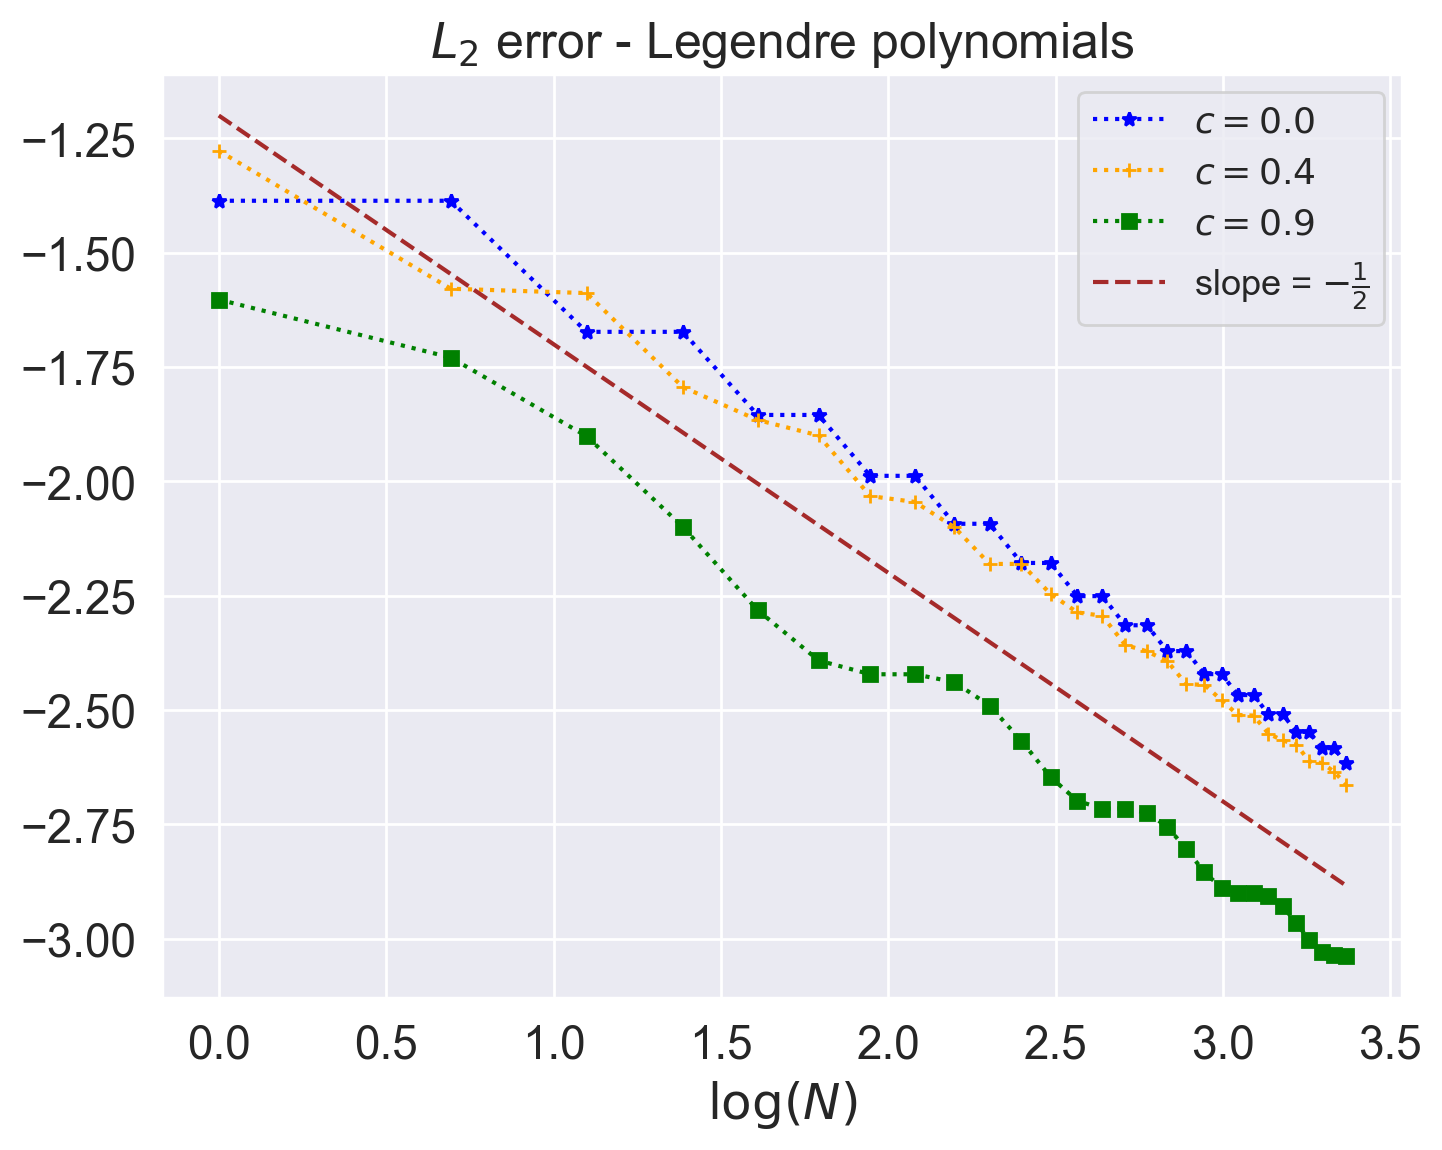

In [74]:
c_legendre = np.array([0.0, 0.4, 0.9])
error_legendre = np.array(
    [
        [
            utils.l2_error(c=c, n_pce=n, n_mc=n_mc, poly="legendre", seed=SEED)[0]
            for n in range_n
        ]
        for c in c_legendre
    ]
)

fig, ax = plt.subplots(figsize=(8, 6))
for i in range(len(c_legendre)):
    ax.plot(
        np.log(range_n),
        np.log(error_legendre[i, :]),
        MARKERS[i],
        markersize=5,
        label=f"$c={c_legendre[i]}$",
        color=COLORS[i],
    )
ax.plot(
    np.log(range_n),
    -0.5 * np.log(range_n) - 1.2,
    "--",
    label="slope = $-\\frac{1}{2}$",
    color="brown",
)
ax.set_xlabel("$\\log(N)$")
ax.set_title("$L_2$ error - Legendre polynomials")
ax.legend(prop={"size": 13.0})
plt.show()

## 1.3 Laguerre

In [75]:
alpha_laguerre = 0.0
c_laguerre = np.array([1.0, 2.0, 3.0])
error_laguerre = np.array(
    [
        [
            utils.l2_error(
                c=c,
                n_pce=n,
                n_mc=n_mc,
                alpha=alpha_laguerre,
                poly="laguerre",
                seed=SEED,
            )[0]
            for n in range_n
        ]
        for c in c_laguerre
    ]
)

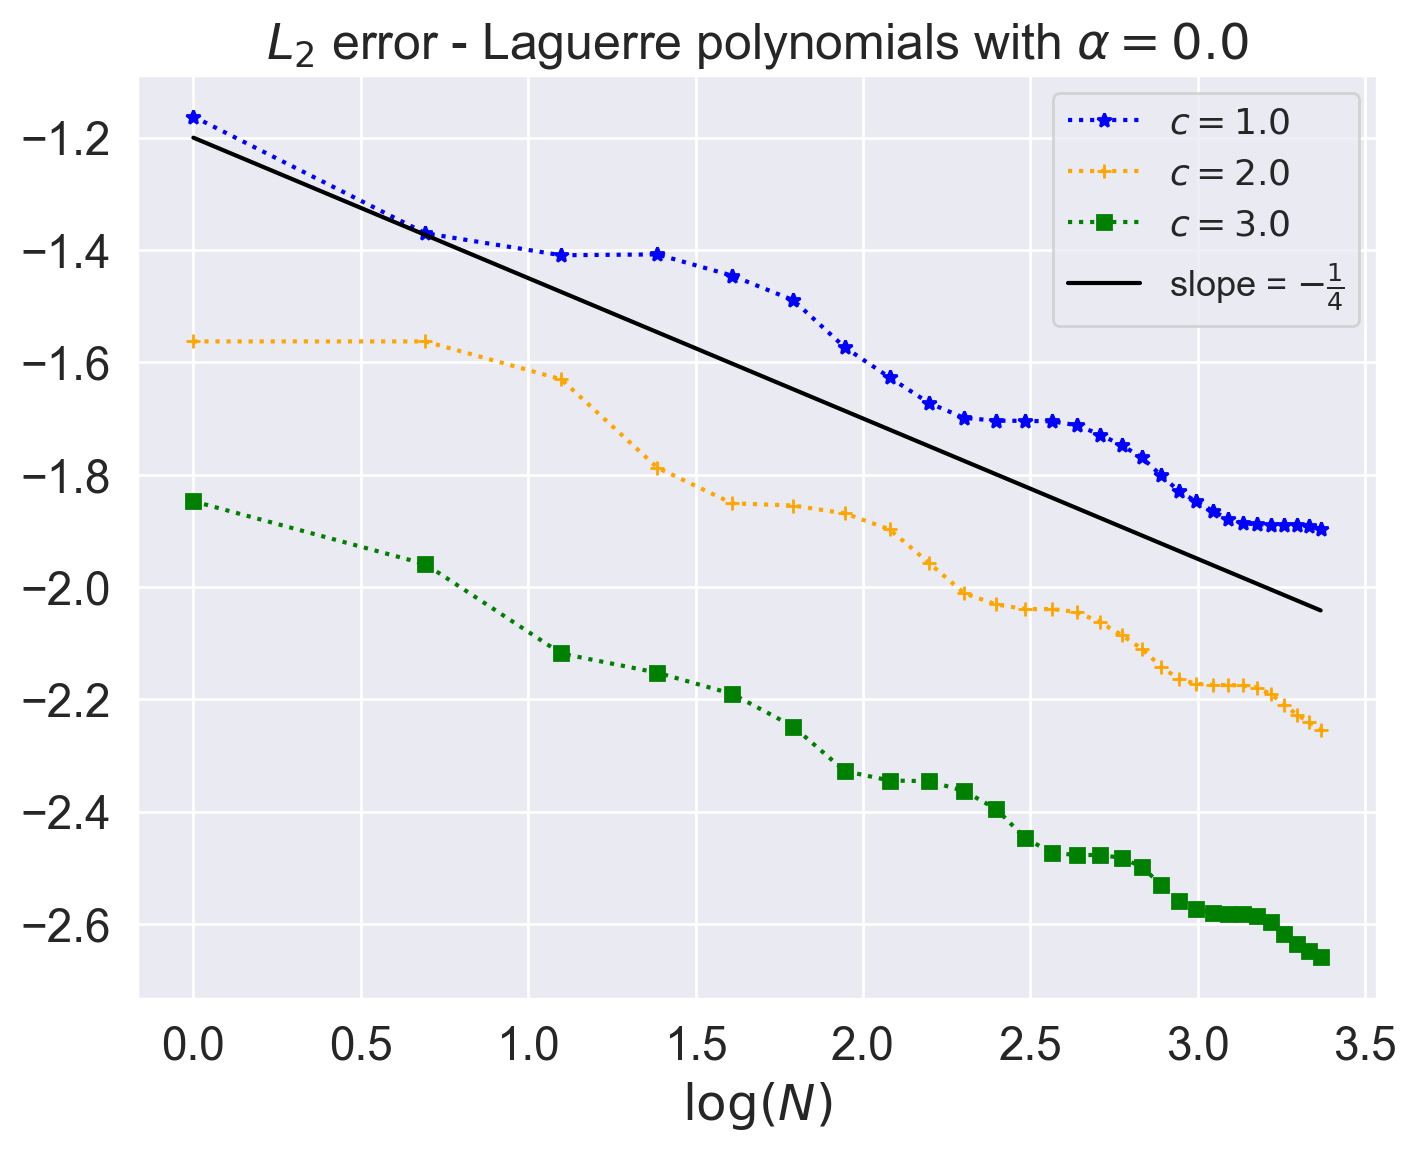

In [76]:
fig, ax = plt.subplots(figsize=(8, 6))
for i in range(len(c_laguerre)):
    ax.plot(
        np.log(range_n),
        np.log(error_laguerre[i, :]),
        MARKERS[i],
        markersize=5,
        label=f"$c={c_laguerre[i]}$",
        color=COLORS[i],
    )
ax.plot(
    np.log(range_n),
    -0.25 * np.log(range_n) - 1.2,
    "-",
    label="slope = $-\\frac{1}{4}$",
    color="black",
)
ax.set_xlabel("$\\log(N)$")
ax.set_title(f"$L_2$ error - Laguerre polynomials with $\\alpha={alpha_laguerre}$")
ax.legend(prop={"size": 13.0})
plt.show()

## 1.4 Jacobi

In [77]:
alpha_jacobi = 3.0
beta_jacobi = 4.0
c_jacobi = np.array([0.0, 0.4, 0.6])
error_jacobi = np.array(
    [
        [
            utils.l2_error(
                c=c,
                n_pce=n,
                n_mc=n_mc,
                alpha=alpha_jacobi,
                beta=beta_jacobi,
                poly="jacobi",
                seed=SEED,
            )[0]
            for n in range_n
        ]
        for c in c_jacobi
    ]
)

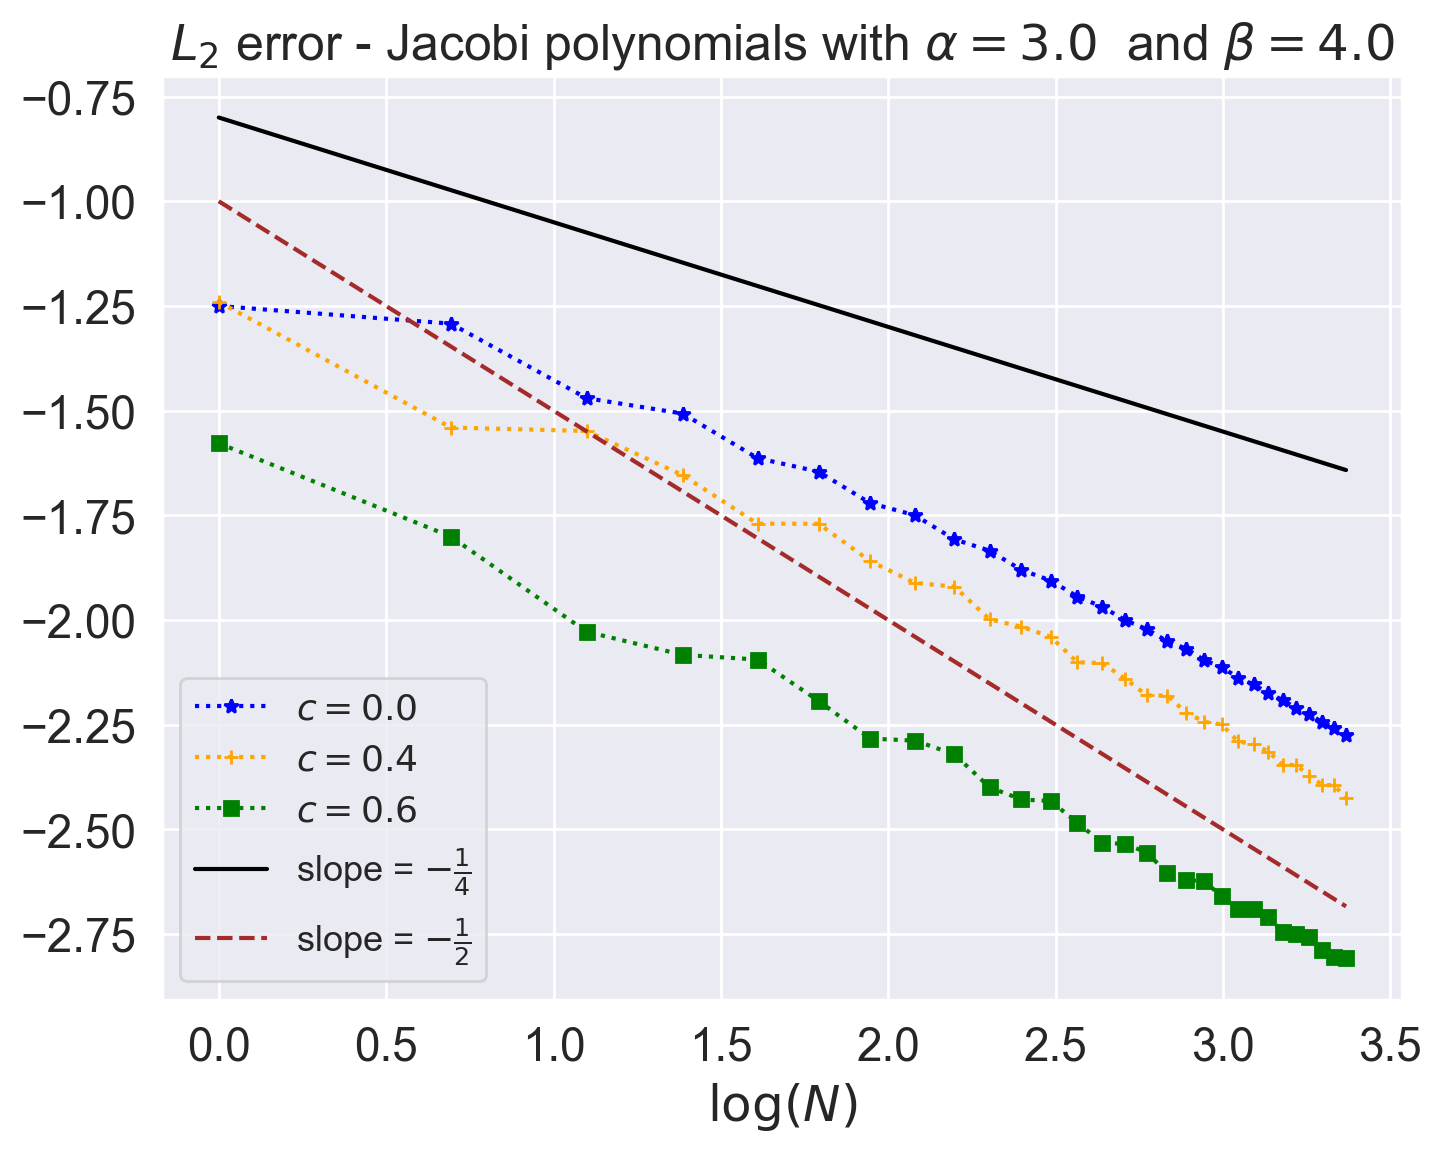

In [78]:
fig, ax = plt.subplots(figsize=(8, 6))
for i in range(len(c_jacobi)):
    ax.plot(
        np.log(range_n),
        np.log(error_jacobi[i, :]),
        MARKERS[i],
        markersize=5,
        label=f"$c={c_jacobi[i]}$",
        color=COLORS[i],
    )
ax.plot(
    np.log(range_n),
    -0.25 * np.log(range_n) - 0.8,
    "-",
    label="slope = $-\\frac{1}{4}$",
    color="black",
)
ax.plot(
    np.log(range_n),
    -0.5 * np.log(range_n) - 1.0,
    "--",
    label="slope = $-\\frac{1}{2}$",
    color="brown",
)
ax.set_xlabel("$\\log(N)$")
ax.set_title(
    f"$L_2$ error - Jacobi polynomials with $\\alpha={alpha_jacobi}$ "
    f" and $\\beta={beta_jacobi}$",
)
ax.legend(prop={"size": 13.0})
plt.show()

## $L^2$ error for the Jacobi polynomials w.r.t. $q \in (0,1)$ for $N = 40$

In [108]:
alphas = np.array([-0.7, -0.5, 10])
betas = np.array([0.3, -0.5, 12])

tab_c = np.linspace(0.5 * 10 ** (-1), 1 - 0.5 * 10 ** (-1), 20)
c_legendre = 2 * tab_c - 1
c_jacobi = np.array(
    [
        special.betaincinv(beta + 1, alpha + 1, tab_c)
        for alpha, beta in zip(alphas, betas, strict=True)
    ]
)
c_jacobi = 2.0 * c_jacobi - 1

In [109]:
n_pce = 40
n_mc = 5 * 10**4

In [110]:
tab_legendre = np.array(
    [
        utils.l2_error(c=c, n_pce=n_pce, n_mc=n_mc, poly="legendre", seed=SEED)
        for c in c_legendre
    ]
)

In [111]:
tab_jacobi = np.array(
    [
        np.array(
            [
                utils.l2_error(
                    c=c,
                    n_pce=n_pce,
                    n_mc=n_mc,
                    alpha=alphas[i],
                    beta=betas[i],
                    poly="jacobi",
                    seed=SEED,
                )
                for c in c_jacobi[i, :]
            ]
        )
        for i in range(len(alphas))
    ]
)

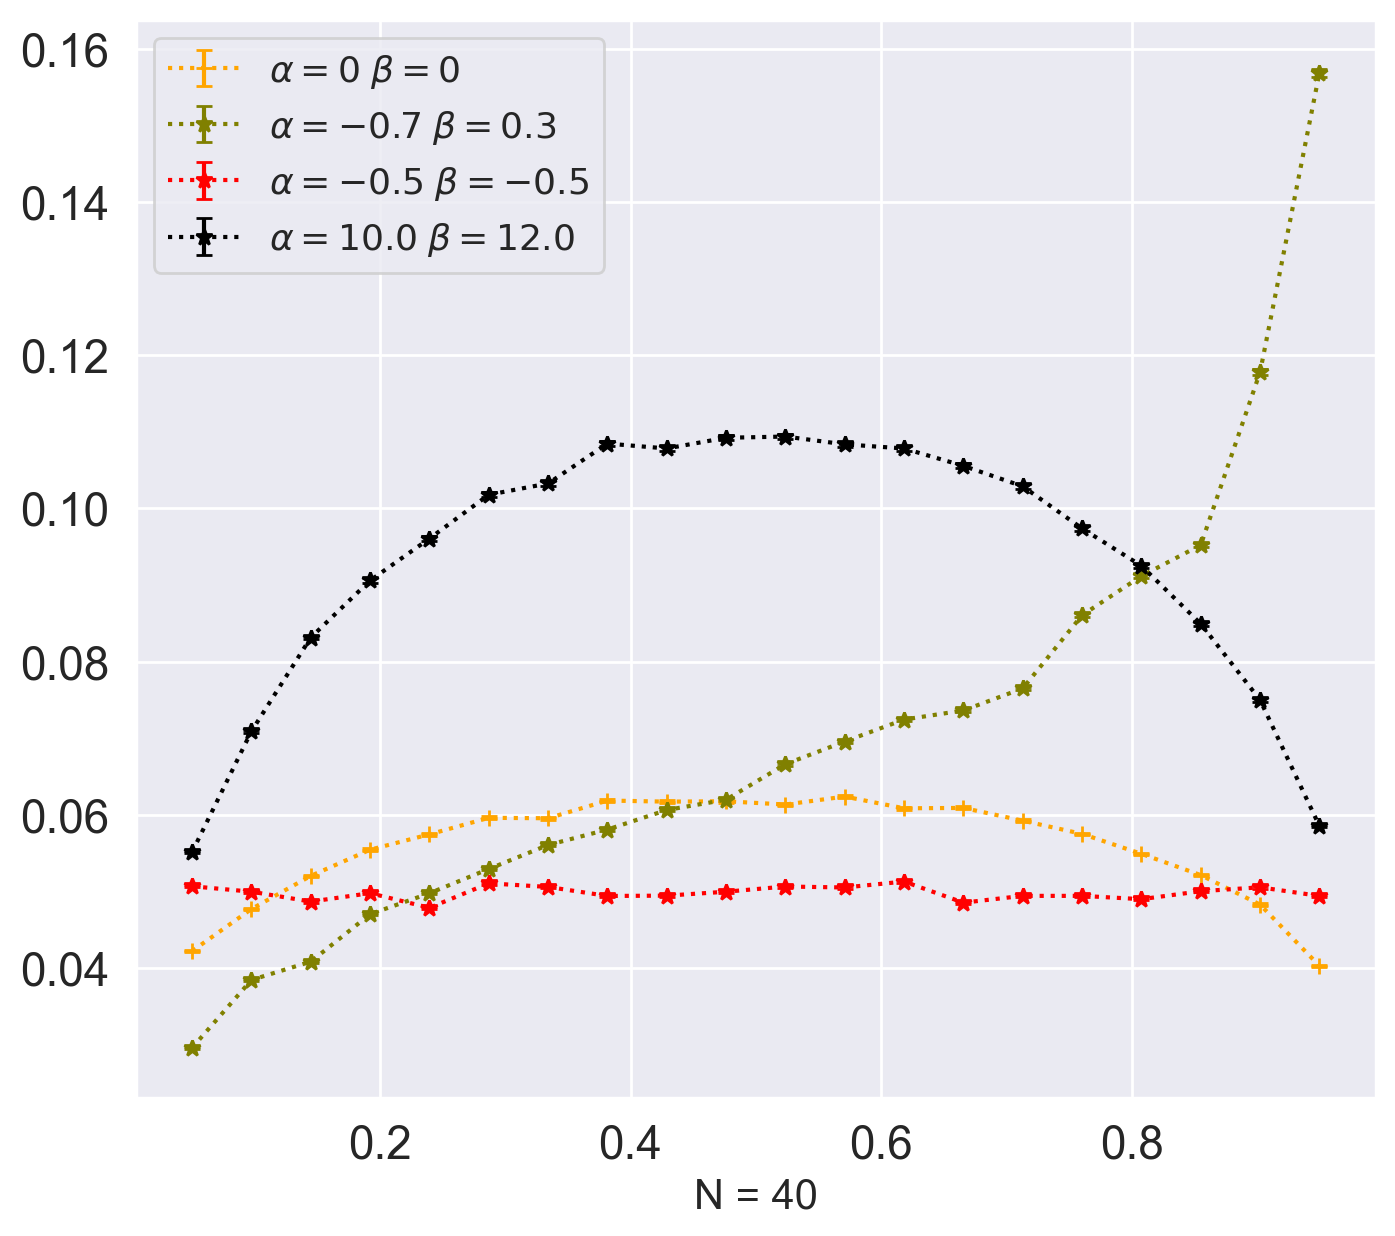

In [112]:
COLORS = ["olive", "red", "black"]
plt.close()
plt.figure(figsize=(8, 7))
plt.errorbar(
    tab_c,
    tab_legendre[:, 0],
    yerr=tab_legendre[:, 1],
    capsize=3,
    fmt=":+",
    label=f"$\\alpha={0}$ $\\beta={0}$",
    color="orange",
)
for i in range(len(alphas)):
    plt.errorbar(
        tab_c,
        tab_jacobi[i, :, 0],
        yerr=tab_jacobi[i, :, 1],
        capsize=3,
        fmt=":*",
        label=f"$\\alpha={alphas[i]}$ $\\beta={betas[i]}$",
        color=COLORS[i],
    )
plt.xlabel(f"N = {n_pce}", size=15)
plt.legend(loc="best", prop={"size": 13})
plt.show()

## $L^2$ error for the COPS w.r.t. $q \in (0,1)$ and $N \in \{20,30,40,50\}$

In [134]:
alpha_j1 = -0.5
beta_j1 = -0.5
alpha_j2 = 3
beta_j2 = 0
alpha_j3 = 0
beta_j3 = 3
alpha_la1 = 0
alpha_la2 = 3

tab_c = np.linspace(0.5 * 10 ** (-1), 1 - 0.5 * 10 ** (-1), 20)  # normal quantiles
# tab_c = np.linspace(10 ** (-4), 10 ** (-3), 20)  # small quantiles
# tab_c = np.linspace(1 - 10 ** (-3), 1 - 10 ** (-4), 20)  # large quantiles
# tab_c = np.linspace(0.85, 0.9999, 20)

c_hermite = stats.norm.ppf(tab_c)
c_legendre = 2 * tab_c - 1
c_laguerre_1 = special.gammaincinv(alpha_la1 + 1, tab_c)
c_laguerre_2 = special.gammaincinv(alpha_la2 + 1, tab_c)
c_jacobi_1 = 2.0 * special.betaincinv(beta_j1 + 1, alpha_j1 + 1, tab_c) - 1
c_jacobi_2 = 2.0 * special.betaincinv(beta_j2 + 1, alpha_j2 + 1, tab_c) - 1
c_jacobi_3 = 2.0 * special.betaincinv(beta_j3 + 1, alpha_j3 + 1, tab_c) - 1

In [135]:
n_pce = 30
n_mc = 1 * 10**4

In [136]:
error_hermite = np.array(
    [
        utils.l2_error(c=c, n_pce=n_pce, n_mc=n_mc, poly="hermite", seed=SEED)
        for c in c_hermite
    ]
)
error_legendre = np.array(
    [
        utils.l2_error(c=c, n_pce=n_pce, n_mc=n_mc, poly="legendre", seed=SEED)
        for c in c_legendre
    ]
)
error_laguerre_1 = np.array(
    [
        utils.l2_error(
            c=c, n_pce=n_pce, n_mc=n_mc, alpha=alpha_la1, poly="laguerre", seed=SEED
        )
        for c in c_laguerre_1
    ]
)
error_laguerre_2 = np.array(
    [
        utils.l2_error(
            c=c, n_pce=n_pce, n_mc=n_mc, alpha=alpha_la2, poly="laguerre", seed=SEED
        )
        for c in c_laguerre_2
    ]
)
error_jacobi_1 = np.array(
    [
        utils.l2_error(
            c=c,
            n_pce=n_pce,
            n_mc=n_mc,
            alpha=alpha_j1,
            beta=beta_j1,
            poly="jacobi",
            seed=SEED,
        )
        for c in c_jacobi_1
    ]
)
error_jacobi_2 = np.array(
    [
        utils.l2_error(
            c=c,
            n_pce=n_pce,
            n_mc=n_mc,
            alpha=alpha_j2,
            beta=beta_j2,
            poly="jacobi",
            seed=SEED,
        )
        for c in c_jacobi_2
    ]
)
error_jacobi_3 = np.array(
    [
        utils.l2_error(
            c=c,
            n_pce=n_pce,
            n_mc=n_mc,
            alpha=alpha_j3,
            beta=beta_j3,
            poly="jacobi",
            seed=SEED,
        )
        for c in c_jacobi_3
    ]
)

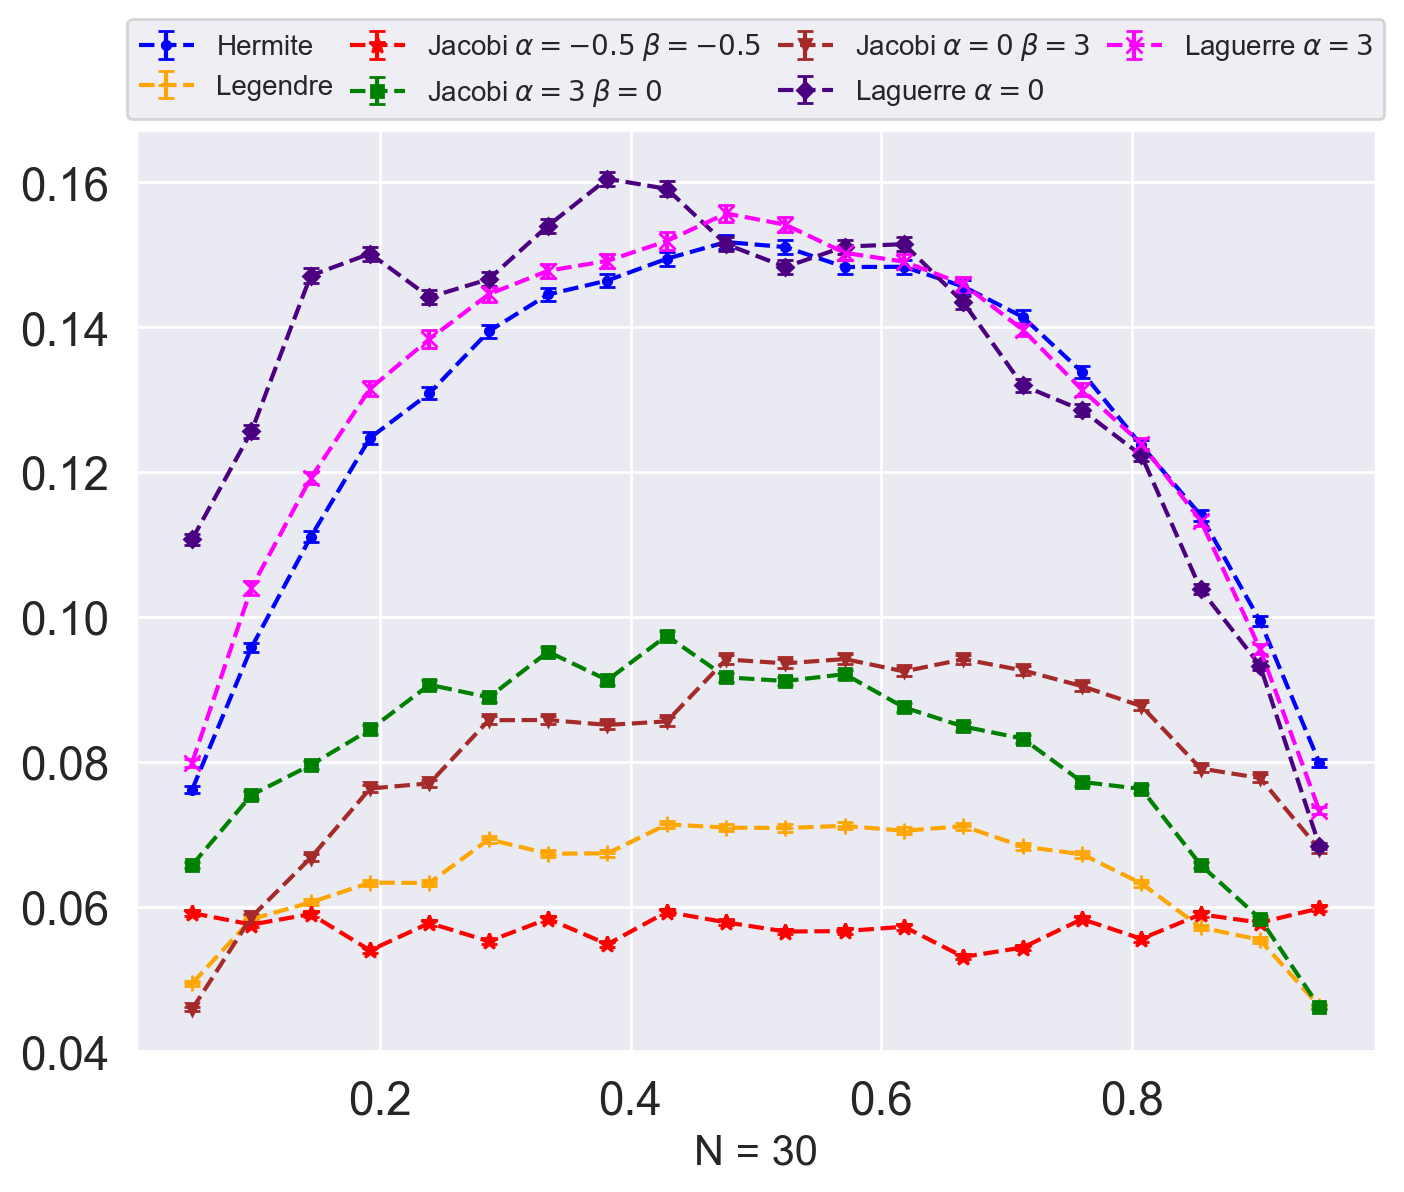

In [137]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.errorbar(
    tab_c,
    error_hermite[:, 0],
    yerr=error_hermite[:, 1],
    capsize=3,
    fmt=".--",
    label="Hermite",
    color="blue",
)
ax.errorbar(
    tab_c,
    error_legendre[:, 0],
    yerr=error_legendre[:, 1],
    capsize=3,
    fmt="+--",
    label="Legendre",
    color="orange",
)
ax.errorbar(
    tab_c,
    error_jacobi_1[:, 0],
    yerr=error_jacobi_1[:, 1],
    capsize=3,
    fmt="*--",
    label=f"Jacobi $\\alpha={alpha_j1}$ $\\beta={beta_j1}$",
    color="red",
)
ax.errorbar(
    tab_c,
    error_jacobi_2[:, 0],
    yerr=error_jacobi_2[:, 1],
    capsize=3,
    fmt="s--",
    markersize=4,
    label=f"Jacobi $\\alpha={alpha_j2}$ $\\beta={beta_j2}$",
    color="green",
)
ax.errorbar(
    tab_c,
    error_jacobi_3[:, 0],
    yerr=error_jacobi_3[:, 1],
    capsize=3,
    fmt="v--",
    markersize=4,
    label=f"Jacobi $\\alpha={alpha_j3}$ $\\beta={beta_j3}$",
    color="brown",
)
ax.errorbar(
    tab_c,
    error_laguerre_1[:, 0],
    yerr=error_laguerre_1[:, 1],
    capsize=3,
    fmt="D--",
    markersize=4,
    label=f"Laguerre $\\alpha={alpha_la1}$",
    color="indigo",
)
ax.errorbar(
    tab_c,
    error_laguerre_2[:, 0],
    yerr=error_laguerre_2[:, 1],
    capsize=3,
    fmt="x--",
    label=f"Laguerre $\\alpha={alpha_la2}$",
    color="magenta",
)
ax.set_xlabel(f"N = {n_pce}", size=15)
ax.legend(
    bbox_to_anchor=(0, 1.02, 1, 0.2),
    loc="lower left",
    mode="expand",
    borderaxespad=-0.3,
    ncol=4,
    prop={"size": 10},
)
# plt.legend(loc='best', prop={'size':8}, ncol=4)
plt.show()

In [ ]:
# L2 errors -- check orders

In [138]:
ratio_hermite = error_hermite[:, 0] * np.exp(0.25 * c_hermite**2) * n_pce**0.25
ci_ratio_hermite = error_hermite[:, 1] * np.exp(0.25 * c_hermite**2) * n_pce**0.25

In [139]:
ratio_legendre = error_legendre[:, 0] * pow(1 - c_legendre**2, -1 / 4) * n_pce**0.5
ci_ratio_legendre = error_legendre[:, 1] * pow(1 - c_legendre**2, -1 / 4) * n_pce**0.5

In [140]:
ratio_laguerre_1 = (
    error_laguerre_1[:, 0]
    * pow(c_laguerre_1, -0.5 * alpha_la1 - 0.25)
    * np.exp(0.5 * c_laguerre_1)
    * n_pce**0.25
)
ci_ratio_laguerre_1 = (
    error_laguerre_1[:, 1]
    * pow(c_laguerre_1, -0.5 * alpha_la1 - 0.25)
    * np.exp(0.5 * c_laguerre_1)
    * n_pce**0.25
)
ratio_laguerre_2 = (
    error_laguerre_2[:, 0]
    * pow(c_laguerre_2, -0.5 * alpha_la2 - 0.25)
    * np.exp(0.5 * c_laguerre_2)
    * n_pce**0.25
)
ci_ratio_laguerre_2 = (
    error_laguerre_2[:, 1]
    * pow(c_laguerre_2, -0.5 * alpha_la2 - 0.25)
    * np.exp(0.5 * c_laguerre_2)
    * n_pce**0.25
)

In [141]:
ratio_jacobi_1 = (
    error_jacobi_1[:, 0]
    * pow(1 - c_jacobi_1, -0.5 * alpha_j1 - 0.25)
    * pow(1 + c_jacobi_1, -0.5 * beta_j1 - 0.25)
    * n_pce**0.5
)
ci_ratio_jacobi_1 = (
    error_jacobi_1[:, 1]
    * pow(1 - c_jacobi_1, -0.5 * alpha_j1 - 0.25)
    * pow(1 + c_jacobi_1, -0.5 * beta_j1 - 0.25)
    * n_pce**0.5
)
ratio_jacobi_2 = (
    error_jacobi_2[:, 0]
    * pow(1 - c_jacobi_2, -0.5 * alpha_j2 - 0.25)
    * pow(1 + c_jacobi_2, -0.5 * beta_j2 - 0.25)
    * n_pce**0.5
)
ci_ratio_jacobi_2 = (
    error_jacobi_2[:, 1]
    * pow(1 - c_jacobi_2, -0.5 * alpha_j2 - 0.25)
    * pow(1 + c_jacobi_2, -0.5 * beta_j2 - 0.25)
    * n_pce**0.5
)
ratio_jacobi_3 = (
    error_jacobi_3[:, 0]
    * pow(1 - c_jacobi_3, -0.5 * alpha_j3 - 0.25)
    * pow(1 + c_jacobi_3, -0.5 * beta_j3 - 0.25)
    * n_pce**0.5
)
ci_ratio_jacobi_3 = (
    error_jacobi_3[:, 1]
    * pow(1 - c_jacobi_3, -0.5 * alpha_j3 - 0.25)
    * pow(1 + c_jacobi_3, -0.5 * beta_j3 - 0.25)
    * n_pce**0.5
)

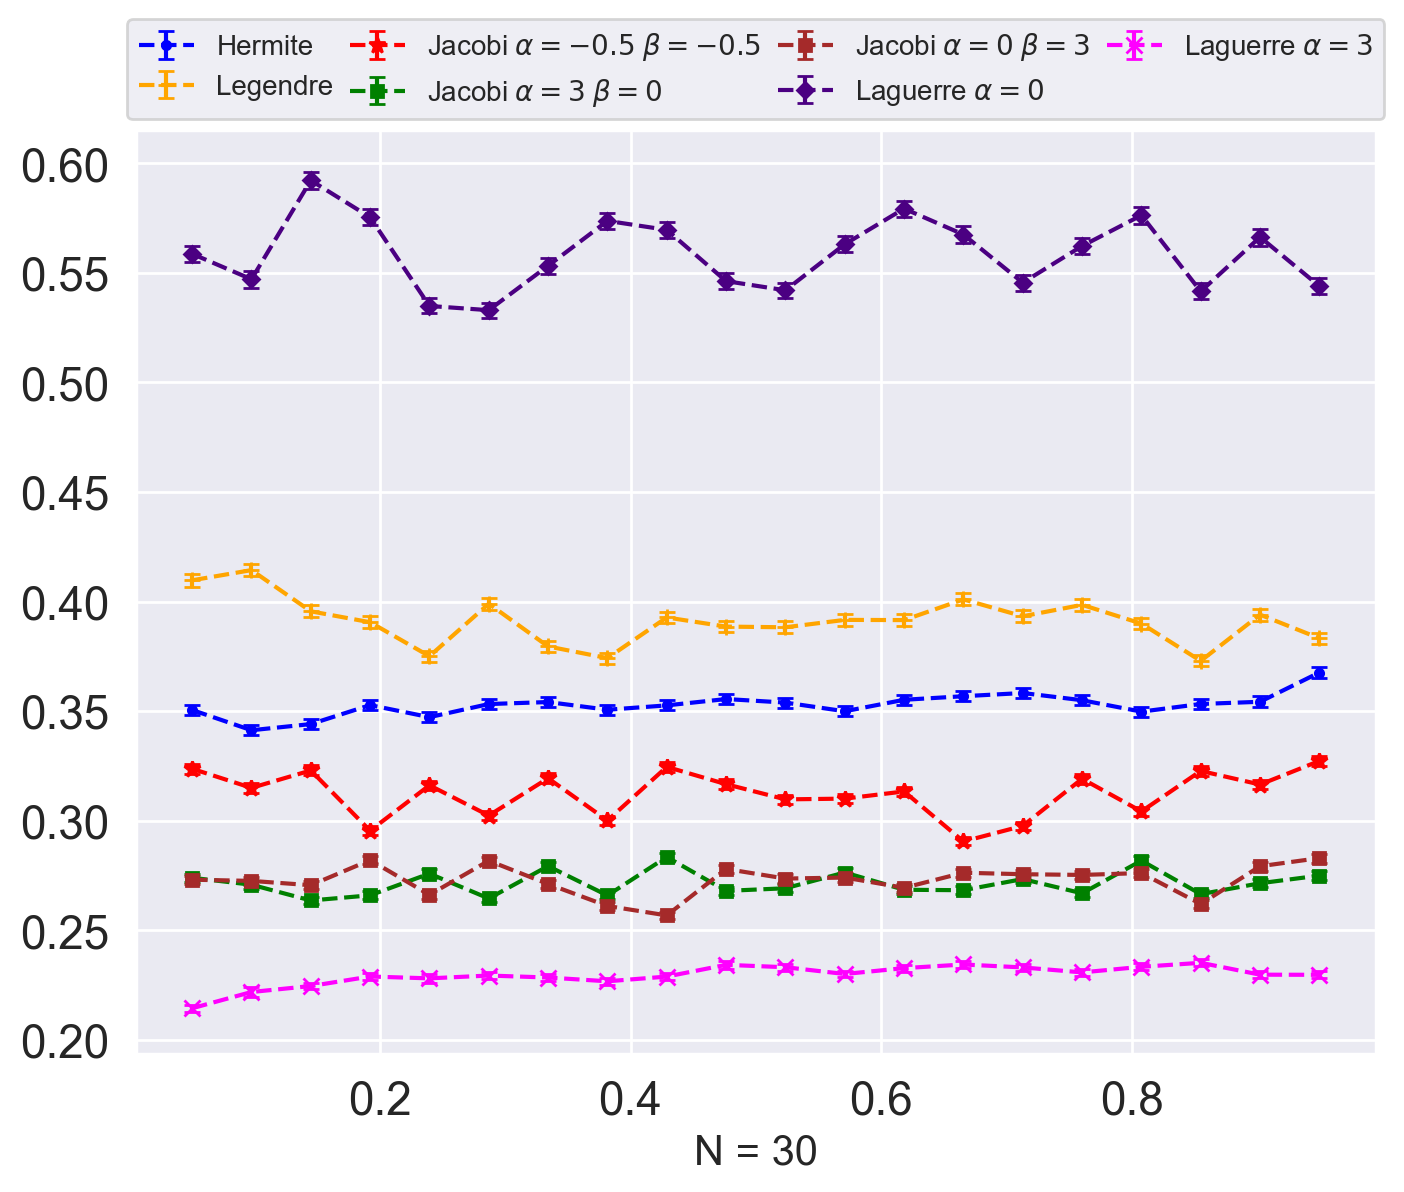

In [142]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.errorbar(
    tab_c,
    ratio_hermite,
    yerr=ci_ratio_hermite,
    capsize=3,
    fmt=".--",
    label="Hermite",
    color="blue",
)
ax.errorbar(
    tab_c,
    ratio_legendre,
    yerr=ci_ratio_legendre,
    capsize=3,
    fmt="+--",
    label="Legendre",
    color="orange",
)
ax.errorbar(
    tab_c,
    ratio_jacobi_1,
    yerr=ci_ratio_jacobi_1,
    capsize=3,
    fmt="*--",
    label=f"Jacobi $\\alpha={alpha_j1}$ $\\beta={beta_j1}$",
    color="red",
)
ax.errorbar(
    tab_c,
    ratio_jacobi_2,
    yerr=ci_ratio_jacobi_2,
    capsize=3,
    fmt="s--",
    markersize=4,
    label=f"Jacobi $\\alpha={alpha_j2}$ $\\beta={beta_j2}$",
    color="green",
)
ax.errorbar(
    tab_c,
    ratio_jacobi_3,
    yerr=ci_ratio_jacobi_3,
    capsize=3,
    fmt="s--",
    markersize=4,
    label=f"Jacobi $\\alpha={alpha_j3}$ $\\beta={beta_j3}$",
    color="brown",
)
ax.errorbar(
    tab_c,
    ratio_laguerre_1,
    yerr=ci_ratio_laguerre_1,
    capsize=3,
    fmt="D--",
    markersize=4,
    label=f"Laguerre $\\alpha={alpha_la1}$",
    color="indigo",
)
ax.errorbar(
    tab_c,
    ratio_laguerre_2,
    yerr=ci_ratio_laguerre_2,
    capsize=3,
    fmt="x--",
    label=f"Laguerre $\\alpha={alpha_la2}$",
    color="magenta",
)
ax.set_xlabel(f"N = {n_pce}", size=15)
ax.legend(
    bbox_to_anchor=(0, 1.02, 1, 0.2),
    loc="lower left",
    mode="expand",
    borderaxespad=-0.3,
    ncol=4,
    prop={"size": 10},
)
plt.show()